# Code for Figures 1 and 2

Here, using XGI, we reproduce figures 1 and 2 of the paper  
"Do higher-order interactions promote synchronization?"  
Yuanzhao Zhang *, Maxime Lucas *, Federico Battiston  
[arXiv:2203.03060](https://doi.org/10.48550/arXiv.2203.03060)

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sb
from tqdm import tqdm

import xgi
from utils import (
    compute_eigenvalues_multi,
    shuffle_hyperedges,
    random_flag_complex_d2,
    flag_complex_d2,
)

sb.set_theme(style="ticks", context="paper")

fig_dir = "figures/"
results_dir = "results/"

Path(fig_dir).mkdir(parents=True, exist_ok=True)
Path(results_dir).mkdir(parents=True, exist_ok=True)

## Fig. S1

### Generate random structures

In [11]:
N = 100  # number of nodes
p = 0.4 # wiring probability
n_repetitions = 5  # number of realisations of random structures

# generate random simplicial complexes
MSCs = [xgi.random_flag_complex(N, p=p) for i in range(n_repetitions)]

In [12]:
p_shuffle = 1 # probability of shuffling hyperedge 
d_shuffle = 2 # order of hyperedges to shuffle

HGs = []

for S in MSCs:
    edges = S.edges.filterby("order", d_shuffle, "lt").members()
    nodes = S.nodes

    H = shuffle_hyperedges(order=d_shuffle, p=p_shuffle, S=S)

    HGs.append(H)

### Compute Lyapunov exponents

In [13]:
alphas = np.arange(0, 1.01, 0.1)
n_alpha = len(alphas)

lyaps_HG = np.zeros((n_alpha, N, n_repetitions))

# compute Lyapunov exponents for all alpha values
for j, HG in enumerate(HGs):  # for all hypergraphs

    for i, alpha in enumerate(alphas):
        lyap_multi = compute_eigenvalues_multi(
            HG, orders=[1, 2], weights=[1 - alpha, alpha]
        )

        lyap_multi = np.sort(lyap_multi)[::-1]
        lyaps_HG[i, :, j] = lyap_multi

lyaps_MSC = np.zeros((n_alpha, N, n_repetitions))

# compute Lyapunov exponents for all alpha values
for j, MSC in enumerate(MSCs):  # for all simplicial complexes

    for i, alpha in enumerate(alphas):
        lyap_multi = compute_eigenvalues_multi(
            MSC, orders=[1, 2], weights=[1 - alpha, alpha]
        )

        lyap_multi = np.sort(lyap_multi)[::-1]
        lyaps_MSC[i, :, j] = lyap_multi

In [14]:
# average and std over the random realisations
# consider the second largest exponents only
means_HG = np.mean(lyaps_HG[:, 1, :], axis=1)
std_HG = np.std(lyaps_HG[:, 1, :], axis=1)

means_MSC = np.mean(lyaps_MSC[:, 1, :], axis=1)
std_MSC = np.std(lyaps_MSC[:, 1, :], axis=1)

### Plot results

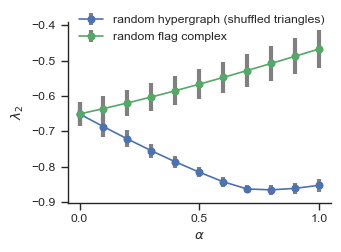

In [22]:
fig, ax = plt.subplots(figsize=(3.4, 2.35))

ax.errorbar(
    alphas,
    means_HG,
    yerr=std_HG,
    fmt="-o",
    color="C0",
    ecolor="gray",
    elinewidth=3,
    capsize=0,
    label="random hypergraph (shuffled triangles)",
)

ax.errorbar(
    alphas,
    means_MSC,
    yerr=std_MSC,
    fmt="-o",
    color="C2",
    ecolor="gray",
    elinewidth=3,
    capsize=0,
    label="random flag complex",
)

ax.set_ylabel(r"$\lambda_2$")
ax.set_xlabel(r"$\alpha$")

ax.set_xticks([0, 0.5, 1])
# ax.set_yticks([-0.5, -0.7, -0.9])

sb.despine()
ax.legend(frameon=False, bbox_to_anchor=(0, 1.1), loc="upper left")

fig_name = f"figure_S1_lambda2_HG_SC_N_{N}_ps_{p}_nrep_{n_repetitions}"
plt.savefig(f"{fig_dir}{fig_name}.pdf", dpi=250, bbox_inches="tight")

plt.show()

## Fig S2

In [23]:
N = 100  # number of nodes
ps = [
    0.1,
    0.1,
]  # ps[i] is the wiring probability of any i+2 nodes (ps[0] is for edges, e.g.)

n_repetitions = 5  # number of realisations of random structures

# generate random hypergraphs
HGs = [xgi.random_hypergraph(N, ps) for i in range(n_repetitions)]

In [24]:
SCs = []

for H in HGs:

    # convert to a simplicial complex by adding subfaces
    S = xgi.SimplicialComplex(H.edges.members()) 
    SCs.append(S)

In [25]:
alphas = np.arange(0, 1.01, 0.1)
n_alpha = len(alphas)

lyaps_HG = np.zeros((n_alpha, N, n_repetitions))

# compute Lyapunov exponents for all alpha values
for j, HG in enumerate(HGs):  # for all hypergraphs

    for i, alpha in enumerate(alphas):
        lyap_multi = compute_eigenvalues_multi(
            HG, orders=[1, 2], weights=[1 - alpha, alpha]
        )

        lyap_multi = np.sort(lyap_multi)[::-1]
        lyaps_HG[i, :, j] = lyap_multi

lyaps_SC = np.zeros((n_alpha, N, n_repetitions))

# compute Lyapunov exponents for all alpha values
for j, SC in enumerate(SCs):  # for all simplicial complexes

    for i, alpha in enumerate(alphas):
        lyap_multi = compute_eigenvalues_multi(
            SC, orders=[1, 2], weights=[1 - alpha, alpha]
        )

        lyap_multi = np.sort(lyap_multi)[::-1]
        lyaps_SC[i, :, j] = lyap_multi

In [26]:
# average and std over the random realisations
# consider the second largest exponents only
means_HG = np.mean(lyaps_HG[:, 1, :], axis=1)
std_HG = np.std(lyaps_HG[:, 1, :], axis=1)

means_SC = np.mean(lyaps_SC[:, 1, :], axis=1)
std_SC = np.std(lyaps_SC[:, 1, :], axis=1)

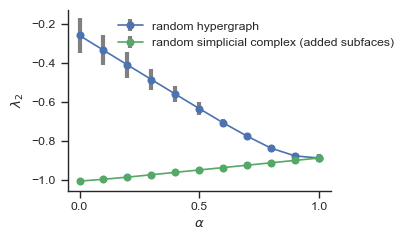

In [27]:
fig, ax = plt.subplots(figsize=(3.4, 2.35))

ax.errorbar(
    alphas,
    means_HG,
    yerr=std_HG,
    fmt="-o",
    color="C0",
    ecolor="gray",
    elinewidth=3,
    capsize=0,
    label="random hypergraph",
)

ax.errorbar(
    alphas,
    means_SC,
    yerr=std_SC,
    fmt="-o",
    color="C2",
    ecolor="gray",
    elinewidth=3,
    capsize=0,
    label="random simplicial complex (added subfaces)",
)

ax.set_ylabel(r"$\lambda_2$")
ax.set_xlabel(r"$\alpha$")

ax.set_xticks([0, 0.5, 1])

sb.despine()
ax.legend(frameon=False, bbox_to_anchor=(0.15, 1))

fig_name = f"figure_S2_lambda2_HG_SC_N_{N}_ps_{ps}_nrep_{n_repetitions}"
plt.savefig(f"{fig_dir}{fig_name}.pdf", dpi=250, bbox_inches="tight")

plt.show()

## Fig. S3

In [28]:
N = 100  # number of nodes
n_repetitions = 50  # number of realisations of random structures

p = 0.4
p2s = [0.1, 0.3, 0.5, 0.7, 0.9] #np.arange(0.1, 1, 0.1)
MSCs = []

G = nx.fast_gnp_random_graph(N, p, seed=4)

for p2 in tqdm(p2s):
    MSC = [flag_complex_d2(G, p2=p2) for i in range(n_repetitions)]
    MSCs.append(MSC)


# SC = [xgi.random_simplicial_complex(N, ps=[0.1, 0.01]) for i in range(n_repetitions)]

100%|███████████████████████████████████████████████████████████| 5/5 [03:06<00:00, 37.28s/it]


In [29]:
alphas = np.arange(0, 1.01, 0.1)
n_alpha = len(alphas)

lyaps_MSCs = []

for MSC in tqdm(MSCs):
    
    lyaps_MSC = np.zeros((n_alpha, N, n_repetitions))

    # compute Lyapunov exponents for all alpha values
    for j, S in enumerate(MSC):  # for all simplicial complexes

        for i, alpha in enumerate(alphas):
            lyap_multi = compute_eigenvalues_multi(
                S, orders=[1, 2], weights=[1 - alpha, alpha]
            )

            lyap_multi = np.sort(lyap_multi)[::-1]
            lyaps_MSC[i, :, j] = lyap_multi
  
    lyaps_MSCs.append(lyaps_MSC)

100%|███████████████████████████████████████████████████████████| 5/5 [02:56<00:00, 35.26s/it]


In [30]:
means_SCs = []
std_SCs = []

for lyaps_MSC in lyaps_MSCs: 
    means_SC = np.mean(lyaps_MSC[:, 1, :], axis=1)
    std_SC = np.std(lyaps_MSC[:, 1, :], axis=1)
    
    means_SCs.append(means_SC)
    std_SCs.append(std_SC)

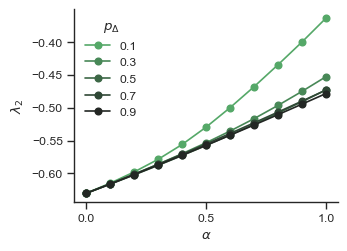

In [132]:
fig, ax = plt.subplots(figsize=(3.4, 2.5))


palette = sb.dark_palette("g", reverse=True, n_colors=len(p2s))
sb.set_palette(palette)

for i, (means_SC, std_SC) in enumerate(zip(means_SCs, std_SCs)):
    ax.errorbar(
        alphas,
        means_SC,
        #yerr=std_SC,
        fmt="-o",
        # color="C2",
        ecolor="gray",
        elinewidth=3,
        capsize=0,
        label=f"{p2s[i]:.1f}",
    )


ax.set_ylabel(r"$\lambda_2$")
ax.set_xlabel(r"$\alpha$")

ax.set_xticks([0, 0.5, 1])

sb.despine()
ax.legend(frameon=False, title="$p_{\Delta}$")

fig_name = f"figure_S3_lambda2_MSC_N_{N}_p2s_{p2s}_nrep_{n_repetitions}"
plt.savefig(f"{fig_dir}{fig_name}.pdf", dpi=250, bbox_inches="tight")

plt.show()